Voice Classification of 2 classes (sameera, mugil) using svm

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [2]:
import librosa as lb
import librosa.display as lbd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os

In [3]:
train_path = r'drive/MyDrive/EPITA/Signal Processing/Assi 1/data/train/'
test_path = r'drive/MyDrive/EPITA/Signal Processing/Assi 1/data/test'

## Loading audio with librosa

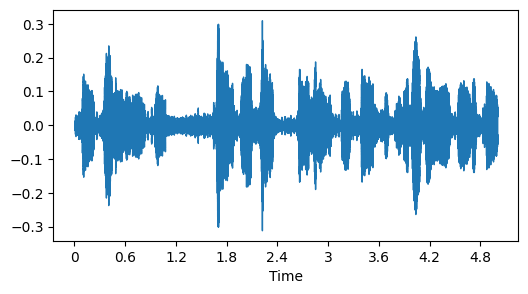

In [4]:
class_1, sampling_rate = lb.load(os.path.join(train_path, "sameera/ID0_audio1_1.wav"))
plt.figure(figsize=(6, 3))
lbd.waveshow(class_1, sr=sampling_rate)
plt.show()

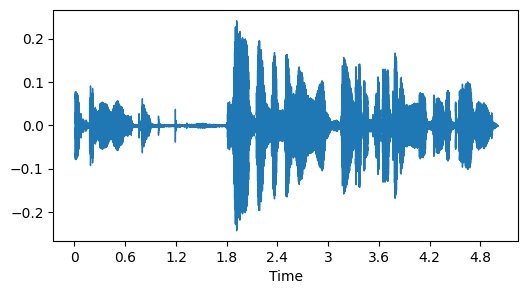

In [5]:
# %loading the audio with librosa
class_2, sampling_rate = lb.load(os.path.join(train_path, "mugil/ID1_audio1_1.wav"))
plt.figure(figsize=(6, 3))
lbd.waveshow(class_2, sr=sampling_rate)
plt.show()

## Plotting the amplitude

Text(0, 0.5, 'Amplitude')

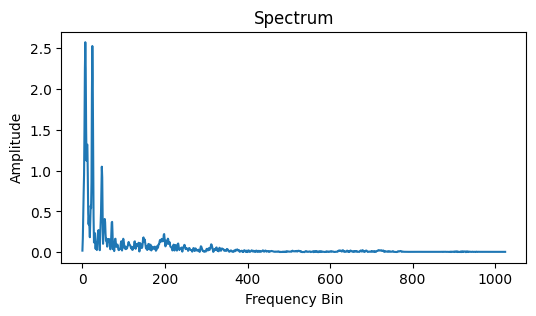

In [7]:
n_fft = 2048
plt.figure(figsize=(6, 3))
ft1 = np.abs(lb.stft(class_1[:n_fft], hop_length = n_fft+1))
plt.plot(ft1)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

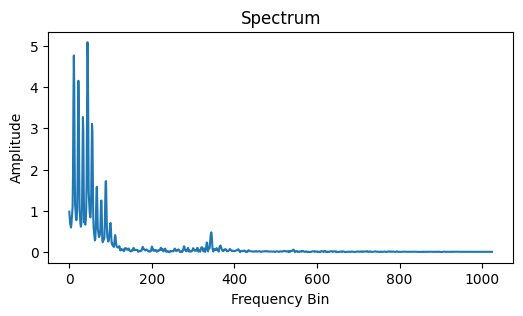

In [8]:
n_fft = 2048
plt.figure(figsize=(6, 3))
ft2 = np.abs(lb.stft(class_2[:n_fft], hop_length = n_fft+1))
plt.plot(ft2)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

## Load the dataset (the features are extracted in another notebook)

In [ ]:
audio_dataset_path = r'drive/MyDrive/EPITA/Signal Processing/Assi 1/dataset.csv'
data = pd.read_csv(audio_dataset_path)
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,ID1_audio1_0.wav,0.380305,0.014674,1793.239708,1925.188144,3689.006551,0.079022,-424.979706,101.550133,-2.556453,...,-6.772683,-0.129053,-2.938738,0.463041,-0.357125,-10.983275,1.230101,-6.441688,-2.835754,mugil
1,ID1_audio1_1.wav,0.370030,0.023828,1764.515592,1950.466300,3595.396932,0.070091,-381.920441,108.851021,2.178182,...,-5.124625,-5.084534,-0.228195,-0.777022,0.016329,-10.501588,2.696856,-5.273786,-6.541446,mugil
2,ID1_audio1_2.wav,0.447086,0.017632,2107.231238,2102.639660,4196.532186,0.096684,-399.661011,97.023712,1.568298,...,-3.568289,-4.738481,2.355093,-0.592676,0.403596,-7.191812,-0.475045,-4.973147,-5.469921,mugil
3,ID1_audio1_3.wav,0.380948,0.026941,1695.874528,1868.029456,3385.049438,0.076129,-368.075348,114.427605,7.691221,...,-5.980020,-5.708297,-4.847905,-1.495937,0.036340,-10.032597,0.319362,-4.814512,-5.866321,mugil
4,ID1_audio1_4.wav,0.441521,0.020399,2122.587692,2067.176730,4186.413574,0.101244,-382.074554,97.560722,-4.480982,...,-4.671499,-4.905796,1.489996,-1.096371,-1.503250,-9.593408,-0.633842,-5.445334,-5.215631,mugil


In [ ]:
data = data.drop(['filename'],axis=1)

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

## Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Encoding the labels and scaling the features

In [ ]:
encoder = LabelEncoder() #Encoding the Labels
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

scaler = StandardScaler() #Scaling the Features
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

## Train model using SVM

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_scl, y_train_enc)

SVC()

## Predict the test audios

In [ ]:
predicted = clf.predict(X_test_scl)

## Performance of the model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test_enc, predicted)

array([[4, 0],
       [0, 4]])

In [ ]:
accuracy_score(y_test_enc, predicted)

1.0

In [ ]:
y_test

12      mugil
13      mugil
30    sameera
5       mugil
19    sameera
23    sameera
14      mugil
18    sameera
Name: label, dtype: object

In [ ]:
encoder.inverse_transform(predicted)

array(['mugil', 'mugil', 'sameera', 'mugil', 'sameera', 'sameera',
       'mugil', 'sameera'], dtype=object)

The SVM predicts the audio and classify it perfectly with the features extracted from the audios